<a href="https://colab.research.google.com/github/menna601/data-mining-project/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Members:** 

---

###  1- Menna Allah  Ramadan Eltairy (15p3041).
###  2- Mennat - Allah Ashraf Fouad (17p3051).




#**1. Classification using Decision Tree**

###Step 1: Standard Scientific Python Imports

In [ ]:
import matplotlib.pyplot as plt
from numpy import mean

###Step 2: Import Datasets, Decision Tree Classifier and Performance Metrics
---


This step includes importing Datasets with no. of classes = 2 (default=10) , Decision Tree Classifier and Performance Metrics.

In [ ]:

from sklearn import datasets, metrics, tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
digits = datasets.load_digits(n_class=2)

###Step 3: Plot the Trainig Dataset

---

- Allocate 1 x 6 plots to visulaize the first 6 images of the training set with fixed size 10x3 for each figure.
- Iterate over digits images & targert (their class label).


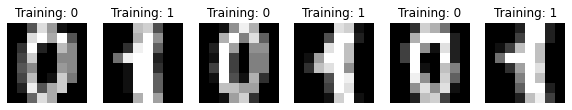

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
    ax.set_title("Training: %i" % label)


###Step 4: Flatten the Images


---


  
  

- Get the no. of figures.
- Reshape data from 1d to 2d with size of no. of images (rows) & -1 (means to auto configure the no.of columns).

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

###Step 5: Create a Classifier ( Decision Tree Classifier )

In [ ]:
clf = tree.DecisionTreeClassifier()

###Step 6: Split Data into 50% Train and 50% Test Subsets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

###Step 7: Learn the Digits on the Train Subset

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

###Step 8: Plot the Decision Tree

[Text(0.5, 0.75, 'X[36] <= 5.0\ngini = 0.5\nsamples = 180\nvalue = [90, 90]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 90\nvalue = [90, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 90\nvalue = [0, 90]')]

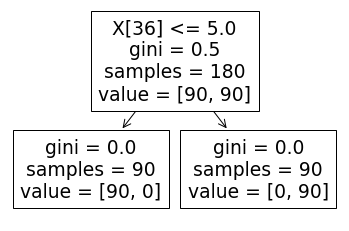

In [ ]:
tree.plot_tree(clf)

###Step 9: Predict the Value of the Digit on the Test Subset

In [ ]:
predicted = clf.predict(X_test)

###Step 10: Plot Predicted Class Label for the Test Image
---


This step is the same as step 3 but for the predicted class label for the test images.

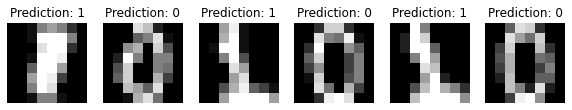

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

###Step 11: Display the Confusion Matrix

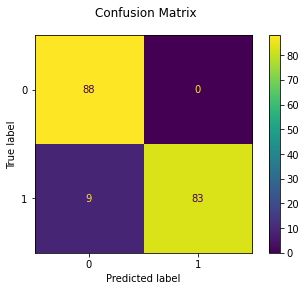

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

###Step 12: Calculate Accuracy Measures

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print(f"accuracy = {(tp+tn)/len(predicted)}")
print(f"error rate = {(fp+fn)/len(predicted)}")
print(f"sensitivity = {(tp)/tp+fn}")
print(f"specifity = {(tn)/tn+fp}")
print(f"precision = {(tp)/tp+fp}")

accuracy = 0.95
error rate = 0.05
sensitivity = 10.0
specifity = 1.0
precision = 1.0


###Step 13: Display a Report of the Decision Tree Algorithm

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        88
           1       1.00      0.90      0.95        92

    accuracy                           0.95       180
   macro avg       0.95      0.95      0.95       180
weighted avg       0.95      0.95      0.95       180




#**2. Clustering using KMeans**









### *Step 1: Load the dataset*

---

The beginning is by loading the digits dataset. This dataset contains handwritten digits from 0 to 9. **In the context of clustering, one would like to group images such that the handwritten digits on the image are the same.**








In [ ]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


### *Step 2: Define an Evaluation Benchmark*

---
Defining an evaluation benchmark is important to compare different initialization methods for KMeans. 

> This benchmark will:
*  Create a pipeline which will scale the data using a **StandardScaler**.
*  Train and time the pipeline fitting.
*  Measure the performance of the 
clustering obtained via different metrics.










In [ ]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

### *Step 3: Run The Benchmark*

---


> This step includes comparing the three aproaches:
1. An initialization using **kmeans++**. This method is stochastic and the initialization will be run 4 times.
2. A random initialization. This method is stochastic as well and the initialization will be run 4 times.
3. An initialization based on a PCA projection. The components of the PCA will be used to initialize KMeans. This method is deterministic and a single initialization suffice.










In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.630s	69662	0.680	0.719	0.699	0.570	0.695	0.183
random   	0.158s	69707	0.675	0.716	0.694	0.560	0.691	0.180
PCA-based	0.338s	72686	0.636	0.658	0.647	0.521	0.643	0.146
__________________________________________________________________________________



### *Step 4: Visualize the Results on PCA-Reduced Data*

---
PCA allows to project the data from the original dimensional space into a lower dimensional space. Subsequently, we can use PCA to project into a 2-dimensional space and plot the data and the clusters in this new space.








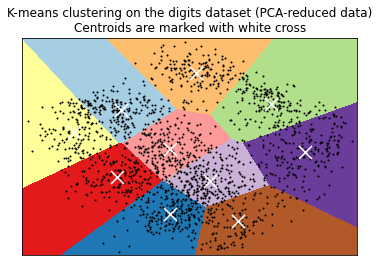

In [ ]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()